In [1]:
pip install gdown pandas matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import gdown


In [5]:
# Download the dataset from Google Drive
file_id = "1gfobhqlVCw8Oo52JCiYpEBGhG5k7cWBr"
url = f"https://drive.google.com/uc?id={file_id}&export=download"
dataset_path = "movie_ratings.csv"
gdown.download(url, dataset_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gfobhqlVCw8Oo52JCiYpEBGhG5k7cWBr&export=download
To: /Users/mujtaba.rasool/movie_ratings.csv
100%|██████████████████████████████████████| 2.48M/2.48M [00:01<00:00, 1.80MB/s]


'movie_ratings.csv'

In [7]:
# Load and preprocess the dataset (Step 1)
df = pd.read_csv(dataset_path)

In [15]:
# Binarize rewards: Rating >= 4 -> Reward = 1, else Reward = 0
df['Reward'] = (df['rating'] >= 4).astype(int)

In [23]:
# Define the environment and compute rewards (Step 2)
movies = df['movieId'].unique()
movie_rewards = {movie: [] for movie in movies}

for movie in movies:
    movie_rewards[movie] = df[df['movieId'] == movie]['Reward'].tolist()

def get_reward(movie_id):
    rewards = movie_rewards[movie_id]
    return rewards[np.random.randint(len(rewards))]

In [25]:
# Simulation setup
num_iterations = 1000
cumulative_rewards = defaultdict(list)

In [27]:
# Random Policy (Step 3)
def random_policy():
    total_reward = 0
    for _ in range(num_iterations):
        movie = np.random.choice(movies)
        reward = get_reward(movie)
        total_reward += reward
        cumulative_rewards['Random'].append(total_reward)
random_policy()

In [29]:
# Greedy Policy (Step 4)
def greedy_policy():
    total_reward = 0
    estimated_rewards = {movie: 0 for movie in movies}
    counts = {movie: 0 for movie in movies}

    for _ in range(num_iterations):
        if 0 in counts.values():  # If an arm hasn't been tried yet, try it
            movie = np.random.choice([m for m in movies if counts[m] == 0])
        else:
            movie = max(movies, key=lambda m: estimated_rewards[m])

        reward = get_reward(movie)
        counts[movie] += 1
        estimated_rewards[movie] += (reward - estimated_rewards[movie]) / counts[movie]
        total_reward += reward
        cumulative_rewards['Greedy'].append(total_reward)
greedy_policy()

In [31]:
# Epsilon-Greedy Policy (Step 5)
def epsilon_greedy_policy(epsilon):
    total_reward = 0
    estimated_rewards = {movie: 0 for movie in movies}
    counts = {movie: 0 for movie in movies}

    for _ in range(num_iterations):
        if np.random.rand() < epsilon:  # Explore
            movie = np.random.choice(movies)
        else:  # Exploit
            movie = max(movies, key=lambda m: estimated_rewards[m])

        reward = get_reward(movie)
        counts[movie] += 1
        estimated_rewards[movie] += (reward - estimated_rewards[movie]) / counts[movie]
        total_reward += reward
        cumulative_rewards[f'Epsilon-{epsilon}'].append(total_reward)

for epsilon in [0.1, 0.2, 0.5]:
    epsilon_greedy_policy(epsilon)

In [33]:
# UCB Algorithm (Step 6)
def ucb_policy():
    total_reward = 0
    estimated_rewards = {movie: 0 for movie in movies}
    counts = {movie: 0 for movie in movies}

    for t in range(1, num_iterations + 1):
        movie = max(movies, key=lambda m: estimated_rewards[m] + np.sqrt(2 * np.log(t) / (counts[m] + 1)))
        reward = get_reward(movie)
        counts[movie] += 1
        estimated_rewards[movie] += (reward - estimated_rewards[movie]) / counts[movie]
        total_reward += reward
        cumulative_rewards['UCB'].append(total_reward)
ucb_policy()

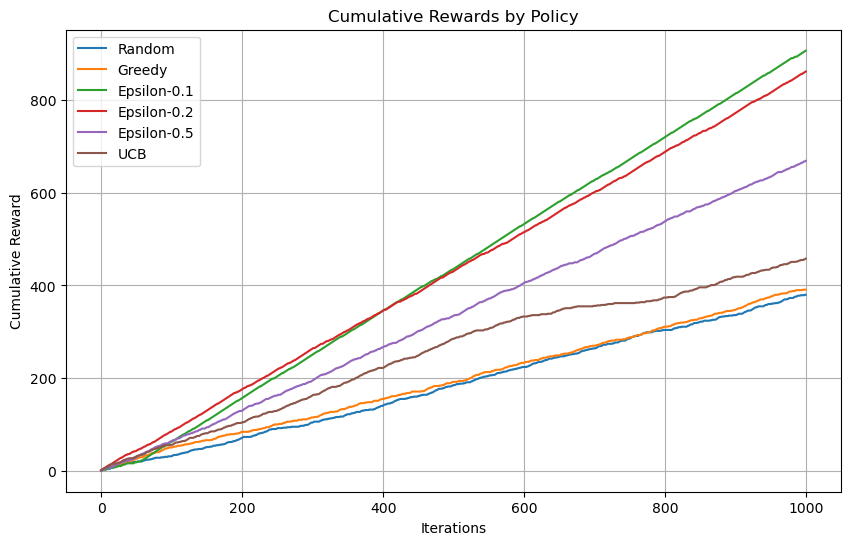

In [34]:
# Plot Cumulative Rewards (Step 7)
plt.figure(figsize=(10, 6))
for policy, rewards in cumulative_rewards.items():
    plt.plot(rewards, label=policy)

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards by Policy')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Conclusion (Step 8)
print("\nConclusion:")
print("The policy with the highest cumulative reward is:", max(cumulative_rewards, key=lambda k: cumulative_rewards[k][-1]))


Conclusion:
The policy with the highest cumulative reward is: Epsilon-0.1
